# Módulo 08 - Estruturas de Dados

## GeoSeries vs GeoDataframe

A `GeoSeries` é um vetor onde cada entrada no vetor é um conjunto de formas correspondentes a uma observação, por exemplo, um único polígono.

Já o `GeoDataframe` é uma estrutura de dados que contém um arquivo `GeoSeries`.

In [1]:
!pip install osgeo 

Defaulting to user installation because normal site-packages is not writeable
  Using cached osgeo-0.0.1.tar.gz (1.2 kB)
  Running setup.py clean for osgeo
Failed to build osgeo
    Running setup.py install for osgeo: started
    Running setup.py install for osgeo: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-a2oqgvg7\\osgeo_c9b30b8bb891479399c06953b5a0378f\\setup.py'"'"'; __file__='"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-a2oqgvg7\\osgeo_c9b30b8bb891479399c06953b5a0378f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\DELL\AppData\Local\Temp\pip-wheel-gz89z07o'
       cwd: C:\Users\DELL\AppData\Local\Temp\pip-install-a2oqgvg7\osgeo_c9b30b8bb891479399c06953b5a0378f\
  Complete output (31 lines):
  running bdist_wheel
  running build
  C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgisp

In [3]:
!pip install click==8.1.3
!pip install geopandas
import geopandas as gpd

Defaulting to user installation because normal site-packages is not writeable
  Using cached click-8.1.3-py3-none-any.whl (96 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
  Using cached shapely-2.0.1-cp39-cp39-win_amd64.whl (1.4 MB)
  Using cached Fiona-1.9.1-cp39-cp39-win_amd64.whl (22.0 MB)
  Using cached pyproj-3.4.1-cp39-cp39-win_amd64.whl (4.8 MB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)


In [4]:
from shapely.geometry import Polygon, LineString, Point

s = gpd.GeoSeries(
    [
        Polygon([(0, 0), (1,1), (0,1)]),
        Polygon([(10, 0), (10,5), (0,0)]),
        Polygon([(0, 0), (2,2), (2,0)]),
        LineString([(0, 0), (1,1), (0,1)]),
        Point(0,1)
    ]

)
s

0    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0....
1    POLYGON ((10.00000 0.00000, 10.00000 5.00000, ...
2    POLYGON ((0.00000 0.00000, 2.00000 2.00000, 2....
3    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
4                              POINT (0.00000 1.00000)
dtype: geometry

In [5]:
type(s)

geopandas.geoseries.GeoSeries

## Diferença entre Dataframe e GeoDataframe



In [16]:
import geopandas as gpd
import os
from osgeo import gdal
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
in_vector = 'C:\Shapefiles\dados_curso_basico\Regionalizacao_BA\gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp'
gdf = gpd.read_file(in_vector)

In [22]:
# Definir o caminho da pasta
pasta = r'C:\Shapefiles\dados_curso_basico\Regionalizacao_BA\gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp'
#pasta = "/content/DPA_A_100K_2022_GCS_SIR_SEI.shp"

# Juntar o nome do arquivo com a pasta
#pasta_arquivo = os.path.join(pasta, 'BR_Municipios_2021.shp')
print(pasta)
#print(pasta_arquivo)

C:\Shapefiles\dados_curso_basico\Regionalizacao_BA\gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp


In [23]:
dados = gpd.read_file(pasta)

In [24]:
type(dados)

geopandas.geodataframe.GeoDataFrame

In [25]:
dados.head(10)

,codmun,nommun,codregmeso,nomregmeso,codregmicr,nomregmicr,codreginte,nomreginte,codregimed,nomregimed,...,nomnte,codnrs,nomnrs,codregsau,nomregsau,codzonatur,nomzonatur,st_area_sh,st_length_,geometry
0,2923001,Nova Viçosa,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.112292,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7..."
1,2922003,Mucuri,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.148912,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7..."
2,2912806,Ibirapoã,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.065687,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6..."
3,2906907,Caravelas,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.202838,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4..."
4,2918902,Lajedão,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.053214,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3..."
5,2900801,Alcobaça,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.125596,1.801024,"POLYGON ((-39.54455 -17.25407, -39.54392 -17.2..."
6,2925501,Prado,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.143639,2.527214,"POLYGON ((-39.29208 -16.88804, -39.29128 -16.8..."
7,2916005,Itanhém,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.118371,2.086310,"POLYGON ((-40.47861 -16.87550, -40.47853 -16.8..."
8,2915601,Itamaraju,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.200316,2.878342,"POLYGON ((-39.69681 -16.72893, -39.69620 -16.7..."
9,2918456,Jucuruçu,2907,Sul Baiano,29032,Porto Seguro,2903,Ilhéus – Itabuna,290008,Teixeira de Freitas,...,Teixeira de Freitas,3,Extremo sul,0,Teixeira de Freitas,NaN,NaN,0.124137,2.912267,"POLYGON ((-40.28126 -16.67303, -40.27991 -16.6..."


In [28]:
dados.tail()

,codmun,nommun,codregmeso,nomregmeso,codregmicr,nomregmicr,codreginte,nomreginte,codregimed,nomregimed,...,nomnte,codnrs,nomnrs,codregsau,nomregsau,codzonatur,nomzonatur,st_area_sh,st_length_,geometry
412,2927101,Rodelas,2902,Vale Sanfranciscano da Bahia,29005,Paulo Afonso,2909,Paulo Afonso,290024,Paulo Afonso,...,Paulo Afonso,6,Norte,0,Paulo Afonso,NaN,NaN,0.183186,3.260990,"POLYGON ((-38.85007 -8.78115, -38.84197 -8.781..."
413,2907707,Chorrochó,2902,Vale Sanfranciscano da Bahia,29005,Paulo Afonso,2909,Paulo Afonso,290024,Paulo Afonso,...,Paulo Afonso,6,Norte,0,Paulo Afonso,NaN,NaN,0.249559,2.820718,"POLYGON ((-39.04231 -8.71451, -39.03443 -8.715..."
414,2907202,Casa Nova,2902,Vale Sanfranciscano da Bahia,29004,Juazeiro,2908,Juazeiro,290022,Juazeiro,...,Juazeiro,6,Norte,0,Juazeiro,NaN,NaN,0.795191,4.447496,"POLYGON ((-41.37434 -8.70315, -41.36931 -8.704..."
415,2900207,Abaré,2902,Vale Sanfranciscano da Bahia,29005,Paulo Afonso,2909,Paulo Afonso,290024,Paulo Afonso,...,Paulo Afonso,6,Norte,0,Paulo Afonso,NaN,NaN,0.136000,1.685219,"POLYGON ((-39.35347 -8.54508, -39.34996 -8.548..."
416,2909901,Curaçá,2902,Vale Sanfranciscano da Bahia,29004,Juazeiro,2908,Juazeiro,290022,Juazeiro,...,Juazeiro,6,Norte,0,Juazeiro,NaN,NaN,0.495925,3.890567,"POLYGON ((-39.38255 -8.52824, -39.37641 -8.529..."


In [30]:
# Verificar o nome das colunas
dados.columns.values

array(['codmun', 'nommun', 'codregmeso', 'nomregmeso', 'codregmicr',
       'nomregmicr', 'codreginte', 'nomreginte', 'codregimed',
       'nomregimed', 'indregpoli', 'indregsemi', 'codti', 'nomti',
       'codregecon', 'nomregecon', 'cod_regadm', 'nomregadm',
       'codeixodes', 'nomeixodes', 'codnte', 'nomnte', 'codnrs', 'nomnrs',
       'codregsau', 'nomregsau', 'codzonatur', 'nomzonatur', 'st_area_sh',
       'st_length_', 'geometry'], dtype=object)

In [31]:
dados = dados[['codmun','nommun','codregmeso', 'nomregmeso', 'codti', 'nomti', 'st_area_sh', 'st_length_', 'geometry']]
dados.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,0.112292,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7..."
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,0.148912,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7..."
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,0.065687,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6..."
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,0.202838,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4..."
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,0.053214,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3..."


In [32]:
dados.shape

(417, 9)

In [33]:
# Verificando o número de linhas e colunas
print(f'O número de linhas é: {dados.shape[0]}')
print(f'O número de colunas é: {dados.shape[1]}')

O número de linhas é: 417
O número de colunas é: 9


<AxesSubplot:>

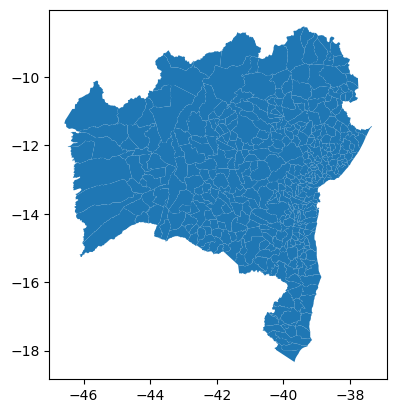

In [34]:
dados.plot()

In [35]:
for indice, linha in dados[0:10].iterrows():
    area_polig = linha['geometry'].area
    print(f"O polígono de índice {indice} possui uma área de {area_polig:.2f} m²")
    

O polígono de índice 0 possui uma área de 0.11 m²
O polígono de índice 1 possui uma área de 0.15 m²
O polígono de índice 2 possui uma área de 0.07 m²
O polígono de índice 3 possui uma área de 0.20 m²
O polígono de índice 4 possui uma área de 0.05 m²
O polígono de índice 5 possui uma área de 0.13 m²
O polígono de índice 6 possui uma área de 0.14 m²
O polígono de índice 7 possui uma área de 0.12 m²
O polígono de índice 8 possui uma área de 0.20 m²
O polígono de índice 9 possui uma área de 0.12 m²


In [36]:
# Criar uma coluna área em km2
dados['Area'] = dados.area
dados.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6464\4255418051.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dados['Area'] = dados.area


,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,Area
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,0.112292,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,0.148912,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,0.065687,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,0.202838,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,0.053214,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214


In [37]:
# Apagando a coluna area por estar fora do padrão de nome de atributo
dados = dados.drop(columns=['Area'])
dados.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,0.112292,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7..."
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,0.148912,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7..."
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,0.065687,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6..."
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,0.202838,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4..."
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,0.053214,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3..."


In [39]:
# Criar uma coluna área em km2
dados['area_km2'] = dados.area
dados.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6464\1321162748.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dados['area_km2'] = dados.area


,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,0.112292,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,0.148912,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,0.065687,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,0.202838,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,0.053214,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214


In [40]:
# Transformando o atributo st_area_sh em km2
dados['st_area_sh'] = dados['area_km2'] * 100
dados.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,11.229212,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,14.891190,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,6.568659,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,20.283775,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,5.321426,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214


In [45]:
# área máxima de st_area_sh
round(dados['st_area_sh'].max(), 2)

129.36

In [46]:
# área mínima de st_area_sh
dados['st_area_sh'].min()

0.2749316655600316

In [47]:
# área média de st_area_sh
dados['st_area_sh'].mean()

11.276888146242879

In [48]:
# Soma de todas as áreas de st_area_sh 
dados['st_area_sh'].sum() / dados['st_area_sh'].shape[0]

11.276888146242879

# Selecionando um Município e Salvando

In [49]:
select = dados.loc[dados['nommun'] == 'Senhor do Bonfim']

In [50]:
select.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
390,2930105,Senhor do Bonfim,2903,Centro Norte Baiano,25,Piemonte Norte do Itapicuru,6.518701,1.227376,"POLYGON ((-40.05774 -10.32370, -40.05764 -10.3...",0.065187


<AxesSubplot:>

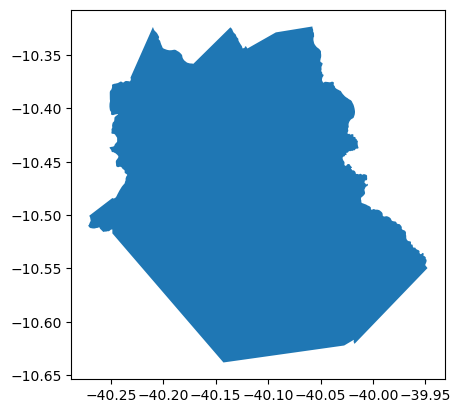

In [51]:
select.plot()

In [53]:
pasta_saida = r"C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios"

# Criar pasta
os.mkdir(pasta_saida)

In [54]:
arquivo_saida = os.path.join(pasta_saida, "BA_Senhor_do_Bonfim.shp")
print(arquivo_saida)

C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios\BA_Senhor_do_Bonfim.shp


In [55]:
# Salvando o arquivo
select.to_file(arquivo_saida)

# Agrupando GeoDataframe

In [56]:
dados.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,11.229212,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,14.891190,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,6.568659,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,20.283775,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,5.321426,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214


In [57]:
# DPA da Bahia com informações de TI e agrupar os municípios por TI
dados['nomti'].unique()

array(['Extremo Sul', 'Costa do Descobrimento', 'Médio Sudoeste da Bahia',
       'Litoral Sul', 'Sudoeste Baiano', 'Baixo Sul', 'Sertão Produtivo',
       'Médio Rio de Contas', 'Bacia do Rio Corrente', 'Velho Chico',
       'Vale do Jiquiriçá', 'Chapada Diamantina',
       'Piemonte Norte do Itapicuru', 'Semiárido Nordeste II',
       'Sertão do São Francisco', 'Bacia do Paramirim', 'Itaparica',
       'Recôncavo', 'Metropolitano de Salvador', 'Piemonte do Paraguaçu',
       'Litoral Norte e Agreste Baiano', 'Portal do Sertão',
       'Bacia do Rio Grande', 'Bacia do Jacuípe', 'Sisal', 'Irecê',
       'Piemonte da Diamantina'], dtype=object)

In [58]:
agrupar = dados.groupby('nomti')
agrupar

In [61]:
agrupar.groups.keys()

dict_keys(['Bacia do Jacuípe', 'Bacia do Paramirim', 'Bacia do Rio Corrente', 'Bacia do Rio Grande', 'Baixo Sul', 'Chapada Diamantina', 'Costa do Descobrimento', 'Extremo Sul', 'Irecê', 'Itaparica', 'Litoral Norte e Agreste Baiano', 'Litoral Sul', 'Metropolitano de Salvador', 'Médio Rio de Contas', 'Médio Sudoeste da Bahia', 'Piemonte Norte do Itapicuru', 'Piemonte da Diamantina', 'Piemonte do Paraguaçu', 'Portal do Sertão', 'Recôncavo', 'Semiárido Nordeste II', 'Sertão Produtivo', 'Sertão do São Francisco', 'Sisal', 'Sudoeste Baiano', 'Vale do Jiquiriçá', 'Velho Chico'])

In [ ]:
for chave, grupo in agrupar:
    print(f'Nome do Território Identidade: {chave}')
    print(f'Número de Municípios: {len(grupo)}')

Nome do Território Identidade: Bacia do Jacuípe
Número de Municípios: 15
Nome do Território Identidade: Bacia do Paramirim
Número de Municípios: 8
Nome do Território Identidade: Bacia do Rio Corrente
Número de Municípios: 11
Nome do Território Identidade: Bacia do Rio Grande
Número de Municípios: 14
Nome do Território Identidade: Baixo Sul
Número de Municípios: 15
Nome do Território Identidade: Chapada Diamantina
Número de Municípios: 24
Nome do Território Identidade: Costa do Descobrimento
Número de Municípios: 8
Nome do Território Identidade: Extremo Sul
Número de Municípios: 13
Nome do Território Identidade: Irecê
Número de Municípios: 20
Nome do Território Identidade: Itaparica
Número de Municípios: 6
Nome do Território Identidade: Litoral Norte e Agreste Baiano
Número de Municípios: 20
Nome do Território Identidade: Litoral Sul
Número de Municípios: 26
Nome do Território Identidade: Metropolitano de Salvador
Número de Municípios: 13
Nome do Território Identidade: Médio Rio de Cont

In [62]:
arquivo_saida = r"C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios"

resultado = os.path.join(arquivo_saida, "Resultados")

if not os.path.exists(resultado):
    print("Criando a pasta.")
    os.makedirs(resultado)
else:
    print("A pasta ja existe")

Criando a pasta.


In [64]:
agrupar.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,11.229212,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,14.891190,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,6.568659,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,20.283775,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,5.321426,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214
...,...,...,...,...,...,...,...,...,...,...
406,2930774,Sobradinho,2902,Vale Sanfranciscano da Bahia,10,Sertão do São Francisco,11.202703,1.838491,"POLYGON ((-40.86880 -9.39284, -40.86528 -9.393...",0.112027
410,2911402,Glória,2902,Vale Sanfranciscano da Bahia,24,Itaparica,12.866774,2.052888,"POLYGON ((-38.52907 -8.95713, -38.52875 -8.957...",0.128668
411,2919900,Macururé,2902,Vale Sanfranciscano da Bahia,24,Itaparica,20.951313,2.543698,"POLYGON ((-38.84282 -9.03920, -38.68354 -9.216...",0.209513
412,2927101,Rodelas,2902,Vale Sanfranciscano da Bahia,24,Itaparica,18.318562,3.260990,"POLYGON ((-38.85007 -8.78115, -38.84197 -8.781...",0.183186


In [65]:
for chave, grupo in agrupar:
    nome_saida = f'{chave}.shp'
    print('Salvando o arquivo', os.path.basename(nome_saida))
    caminho_saida = os.path.join(resultado, nome_saida)
    grupo.to_file(caminho_saida)

Salvando o arquivo Bacia do Jacuípe.shp
Salvando o arquivo Bacia do Paramirim.shp
Salvando o arquivo Bacia do Rio Corrente.shp
Salvando o arquivo Bacia do Rio Grande.shp
Salvando o arquivo Baixo Sul.shp
Salvando o arquivo Chapada Diamantina.shp
Salvando o arquivo Costa do Descobrimento.shp
Salvando o arquivo Extremo Sul.shp
Salvando o arquivo Irecê.shp
Salvando o arquivo Itaparica.shp
Salvando o arquivo Litoral Norte e Agreste Baiano.shp
Salvando o arquivo Litoral Sul.shp
Salvando o arquivo Metropolitano de Salvador.shp
Salvando o arquivo Médio Rio de Contas.shp
Salvando o arquivo Médio Sudoeste da Bahia.shp
Salvando o arquivo Piemonte Norte do Itapicuru.shp
Salvando o arquivo Piemonte da Diamantina.shp
Salvando o arquivo Piemonte do Paraguaçu.shp
Salvando o arquivo Portal do Sertão.shp
Salvando o arquivo Recôncavo.shp
Salvando o arquivo Semiárido Nordeste II.shp
Salvando o arquivo Sertão Produtivo.shp
Salvando o arquivo Sertão do São Francisco.shp
Salvando o arquivo Sisal.shp
Salvando

# Trabalhando com Coordenadas

Para saber o código do EPSG da região de interesse existem diversos sites, mas eu costumo utilizar esse aqui: 
https://spatialreference.org/

In [ ]:
import geopandas as gpd

In [66]:
arquivo = r"C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios\Resultados\Bacia do Jacuípe.shp"

In [67]:
dados_bacia_jacuipe = gpd.read_file(arquivo)
dados_bacia_jacuipe.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,area_km2,geometry
0,2930402,Serra Preta,2903,Centro Norte Baiano,15,Bacia do Jacuípe,4.943099,1.130570,0.049431,"POLYGON ((-39.34044 -11.96596, -39.34011 -11.9..."
1,2914000,Ipirá,2903,Centro Norte Baiano,15,Bacia do Jacuípe,25.796304,2.592917,0.257963,"POLYGON ((-39.77998 -11.89869, -39.77909 -11.8..."
2,2902609,Baixa Grande,2903,Centro Norte Baiano,15,Bacia do Jacuípe,8.030085,1.513980,0.080301,"POLYGON ((-40.19306 -11.82801, -40.19308 -11.8..."
3,2924058,Pé de Serra,2904,Nordeste Baiano,15,Bacia do Jacuípe,4.951439,1.092995,0.049514,"POLYGON ((-39.54146 -11.75822, -39.54087 -11.7..."
4,2924652,Pintadas,2903,Centro Norte Baiano,15,Bacia do Jacuípe,5.369395,1.202601,0.053694,"POLYGON ((-39.88515 -11.74014, -39.88512 -11.7..."


In [68]:
# Verificar o sistema de coordenadas
dados_bacia_jacuipe.crs

<Geographic 2D CRS: GEOGCS["GCS_SIRGAS_2000",DATUM["D_Sistema_de_Refer ...>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [69]:
# Criar uma cópia do arquivo
dados_bacia_jacuipe_epsg_4674 = dados_bacia_jacuipe.copy()

# Reprojetar para a coordenada da região
dados_bacia_jacuipe = dados_bacia_jacuipe.to_crs(epsg=31982)

In [70]:
dados_bacia_jacuipe.crs

<Derived Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 54°W and 48°W, northern and southern hemispheres, onshore and offshore. In remainder of South America - between 54°W and 48°W, southern hemisphere, onshore and offshore.
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [71]:
dados_bacia_jacuipe.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,area_km2,geometry
0,2930402,Serra Preta,2903,Centro Norte Baiano,15,Bacia do Jacuípe,4.943099,1.130570,0.049431,"POLYGON ((1777541.426 8649980.443, 1777577.866..."
1,2914000,Ipirá,2903,Centro Norte Baiano,15,Bacia do Jacuípe,25.796304,2.592917,0.257963,"POLYGON ((1729108.392 8659598.529, 1729203.122..."
2,2902609,Baixa Grande,2903,Centro Norte Baiano,15,Bacia do Jacuípe,8.030085,1.513980,0.080301,"POLYGON ((1683659.850 8669379.894, 1683656.860..."
3,2924058,Pé de Serra,2904,Nordeste Baiano,15,Bacia do Jacuípe,4.951439,1.092995,0.049514,"POLYGON ((1756215.884 8674327.266, 1756248.989..."
4,2924652,Pintadas,2903,Centro Norte Baiano,15,Bacia do Jacuípe,5.369395,1.202601,0.053694,"POLYGON ((1718170.485 8677912.580, 1718173.505..."


In [72]:
dados_bacia_jacuipe['area_km2'] = dados_bacia_jacuipe.area
dados_bacia_jacuipe.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,area_km2,geometry
0,2930402,Serra Preta,2903,Centro Norte Baiano,15,Bacia do Jacuípe,4.943099,1.130570,6.190924e+08,"POLYGON ((1777541.426 8649980.443, 1777577.866..."
1,2914000,Ipirá,2903,Centro Norte Baiano,15,Bacia do Jacuípe,25.796304,2.592917,3.220002e+09,"POLYGON ((1729108.392 8659598.529, 1729203.122..."
2,2902609,Baixa Grande,2903,Centro Norte Baiano,15,Bacia do Jacuípe,8.030085,1.513980,1.000879e+09,"POLYGON ((1683659.850 8669379.894, 1683656.860..."
3,2924058,Pé de Serra,2904,Nordeste Baiano,15,Bacia do Jacuípe,4.951439,1.092995,6.195858e+08,"POLYGON ((1756215.884 8674327.266, 1756248.989..."
4,2924652,Pintadas,2903,Centro Norte Baiano,15,Bacia do Jacuípe,5.369395,1.202601,6.706086e+08,"POLYGON ((1718170.485 8677912.580, 1718173.505..."


In [73]:
dados_bacia_jacuipe_epsg_4674.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,area_km2,geometry
0,2930402,Serra Preta,2903,Centro Norte Baiano,15,Bacia do Jacuípe,4.943099,1.130570,0.049431,"POLYGON ((-39.34044 -11.96596, -39.34011 -11.9..."
1,2914000,Ipirá,2903,Centro Norte Baiano,15,Bacia do Jacuípe,25.796304,2.592917,0.257963,"POLYGON ((-39.77998 -11.89869, -39.77909 -11.8..."
2,2902609,Baixa Grande,2903,Centro Norte Baiano,15,Bacia do Jacuípe,8.030085,1.513980,0.080301,"POLYGON ((-40.19306 -11.82801, -40.19308 -11.8..."
3,2924058,Pé de Serra,2904,Nordeste Baiano,15,Bacia do Jacuípe,4.951439,1.092995,0.049514,"POLYGON ((-39.54146 -11.75822, -39.54087 -11.7..."
4,2924652,Pintadas,2903,Centro Norte Baiano,15,Bacia do Jacuípe,5.369395,1.202601,0.053694,"POLYGON ((-39.88515 -11.74014, -39.88512 -11.7..."


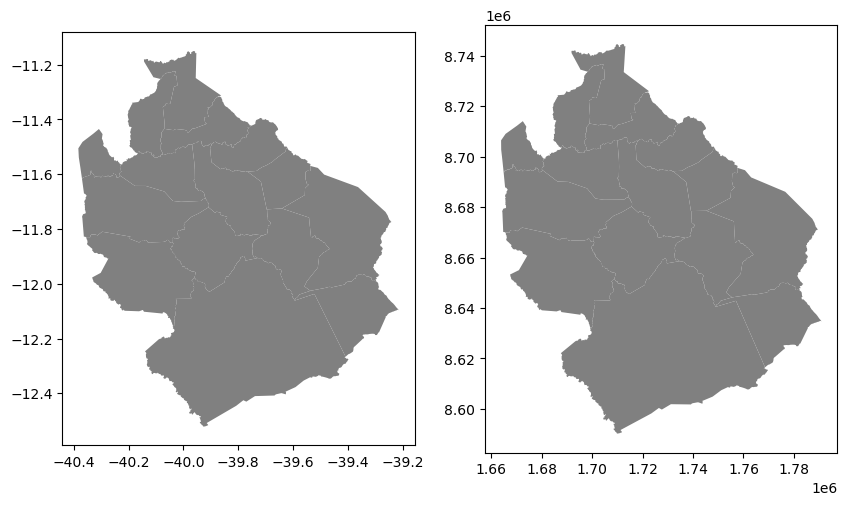

In [74]:
import matplotlib.pyplot as plt

# Fazendo um plot do lado do outro

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

dados_bacia_jacuipe_epsg_4674.plot(ax=ax1, facecolor='gray')
dados_bacia_jacuipe.plot(ax=ax2, facecolor='gray')

# Definir a proporção como 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)


In [81]:
# Criando o path do arquivo de saída EPSG 31982 e EPSG 4674
arquivo_saida_epsg31982 = r'C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios\Resultados\Bacia_Jacuipe_epsg31982.shp'
arquivo_saida_epsg4674 = r'C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios\Resultados\Bacia_Jacuipe_epsg4674.shp'
arquivo_saida_epsg31982

'C:\\Shapefiles\\dados_curso_basico\\Reg_BA\\Municipios\\Resultados\\Bacia_Jacuipe_epsg31982.shp'

In [82]:
arquivo_saida_epsg4674

'C:\\Shapefiles\\dados_curso_basico\\Reg_BA\\Municipios\\Resultados\\Bacia_Jacuipe_epsg4674.shp'

In [83]:
# Salvar o arquivo
dados_bacia_jacuipe.to_file(arquivo_saida_epsg31982)
dados_bacia_jacuipe.to_file(arquivo_saida_epsg4674)

# Fim do módulo 8